# Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Reading the data set
df = pd.read_excel("marketing_campaign.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# To know the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Data cleaning

In [4]:
# Checking for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- The null values are 24 from Income feature 
- The null values are just 1% from the data set

In [5]:
# Droping the null values 
df = df.dropna()
df.shape

(2216, 29)

In [6]:
# checking the duplicates
df.duplicated().sum()

0

In [7]:
# count the unique values of categorical Feature
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [8]:
# count the unique values of categorical Feature
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [9]:
df["Marital_Status"] = df["Marital_Status"].replace(to_replace =["Alone","Absurd","YOLO"], value = "Single")

In [10]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

In [11]:
# dataset shape after dropping
df.shape

(2216, 29)

In [12]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [13]:
df['Age'] = 2023 - df['Year_Birth']

In [14]:
# Summary statistics 
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,54.179603
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000


In [15]:
# lets drop the Z_CostContact, Z_Revenue coloumns ,#both Z_CostContact and  Z_Revenue are having constant value hence considering them redundant,removing these two columns
df = df.drop(df[['Z_CostContact','Z_Revenue']],axis=1)

In [16]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [17]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [18]:
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [19]:
df['Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [20]:
 df['Marital_Status'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner' , 'Widow':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [21]:
cols_to_drop = ['ID','Year_Birth','Kidhome','Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts','MntGoldProds','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5',]
df = df.drop(cols_to_drop, axis=1)
df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Expenses,Children,Campaign
0,Graduate,Alone,58138.0,58,3,8,10,4,7,0,1,66,1617,0,0
1,Graduate,Alone,46344.0,38,2,1,1,2,5,0,0,69,27,2,0
2,Graduate,Partner,71613.0,26,1,8,2,10,4,0,0,58,776,0,0
3,Graduate,Partner,26646.0,26,2,2,0,4,6,0,0,39,53,1,0
4,Postgraduate,Partner,58293.0,94,5,5,3,6,5,0,0,42,422,1,0


<Axes: xlabel='Income'>

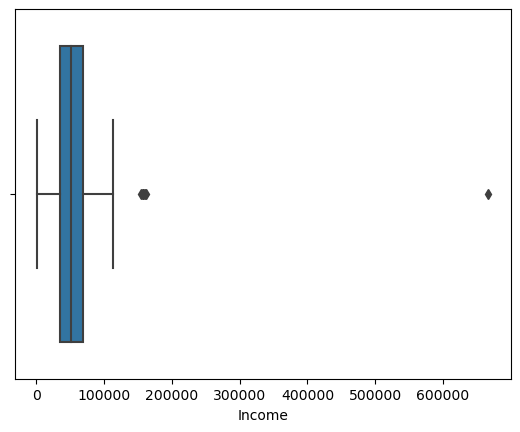

In [22]:
sns.boxplot(x = df['Income'])

In [23]:
iqr_value = df['Income'].quantile(0.75) - df['Income'].quantile(0.25)

MntMeatProducts_outliers = (df['Income'] < df['Income'].quantile(0.25) - 1.5 * iqr_value) | (df['Income'] > df['Income'].quantile(0.75) + 1.5 * iqr_value)
df.loc[MntMeatProducts_outliers, 'Income'] = iqr_value

<Axes: xlabel='Income'>

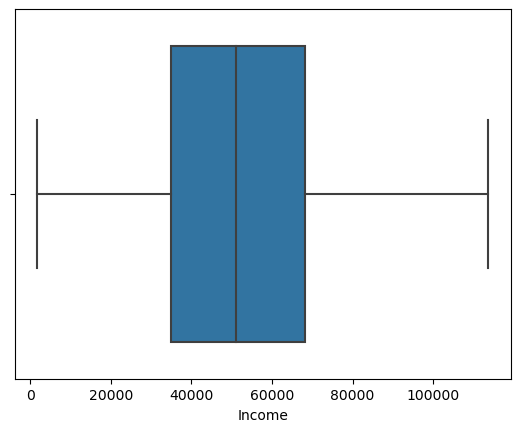

In [24]:
sns.boxplot(x = df['Income'])

<Axes: xlabel='Recency'>

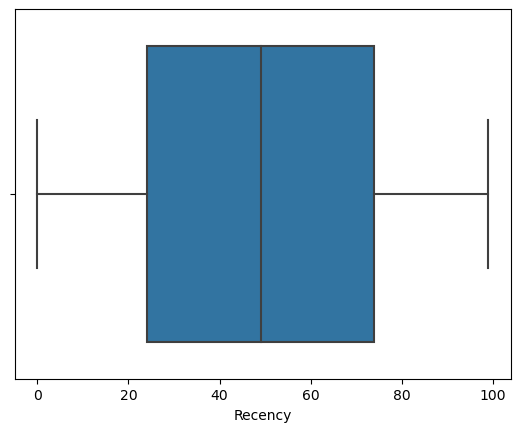

In [25]:
sns.boxplot(x = df['Recency'])

<Axes: xlabel='Age'>

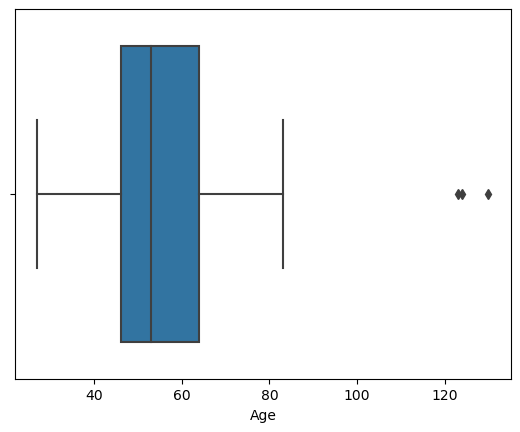

In [26]:
sns.boxplot(x = df['Age'])

In [27]:
Q1 = np.percentile(df['Age'], 25)
Q3 = np.percentile(df['Age'], 75)
IQR = Q3 - Q1
df = df[(df["Age"]>=Q1- 1.5*IQR) & (df["Age"]<=Q3+ 1.5*IQR)]

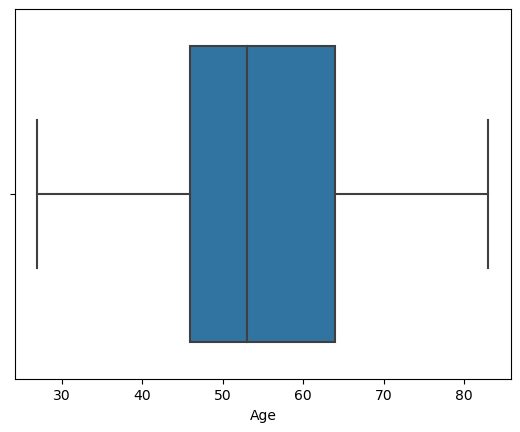

In [28]:
sns.boxplot(x=df["Age"])
plt.show()

## Univariate Analysis

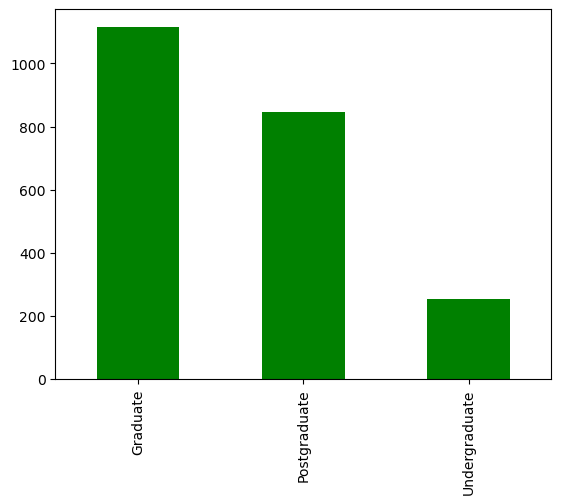

In [29]:
df['Education'].value_counts().plot(kind='bar',color='g')
plt.show()

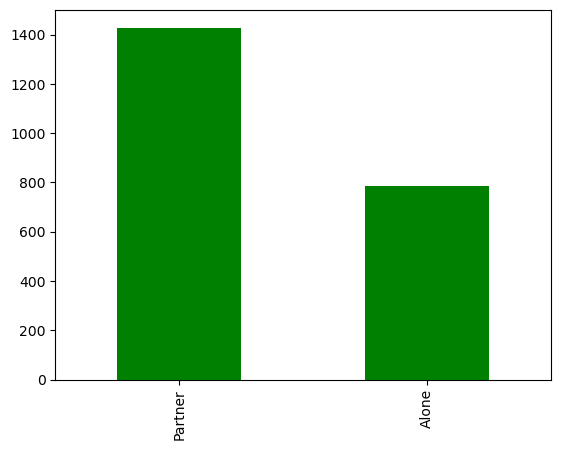

In [30]:
df['Marital_Status'].value_counts().plot(kind='bar',color='g')
plt.show()

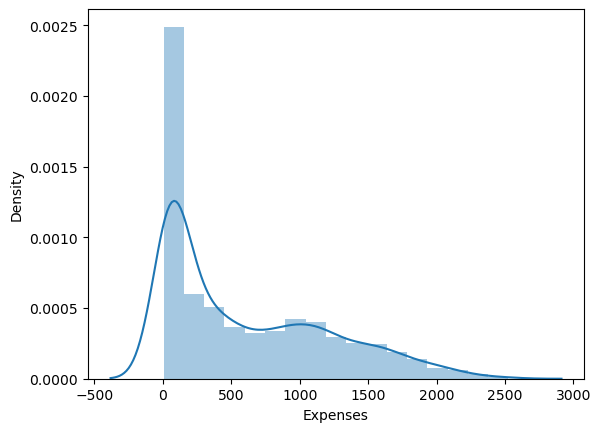

In [31]:
sns.distplot(df['Expenses'],hist = True)
plt.show()

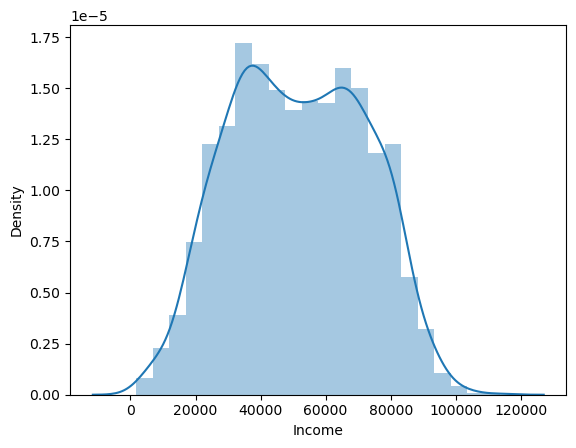

In [32]:
sns.distplot(df['Income'],hist = True)
plt.show()

## Bivariate Analysis

<Axes: xlabel='Income', ylabel='Education'>

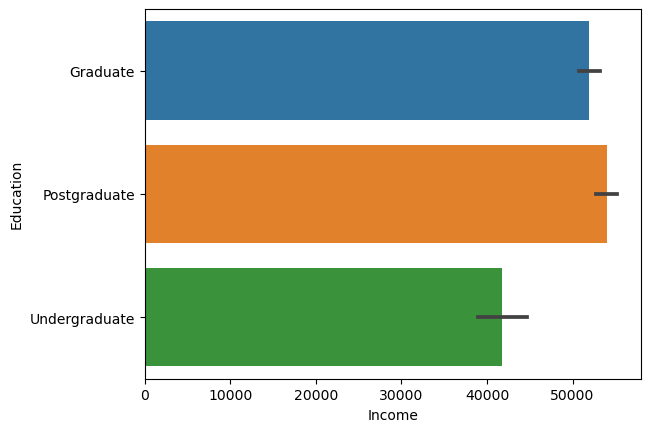

In [33]:
sns.barplot(x='Income', y="Education",  data=df)

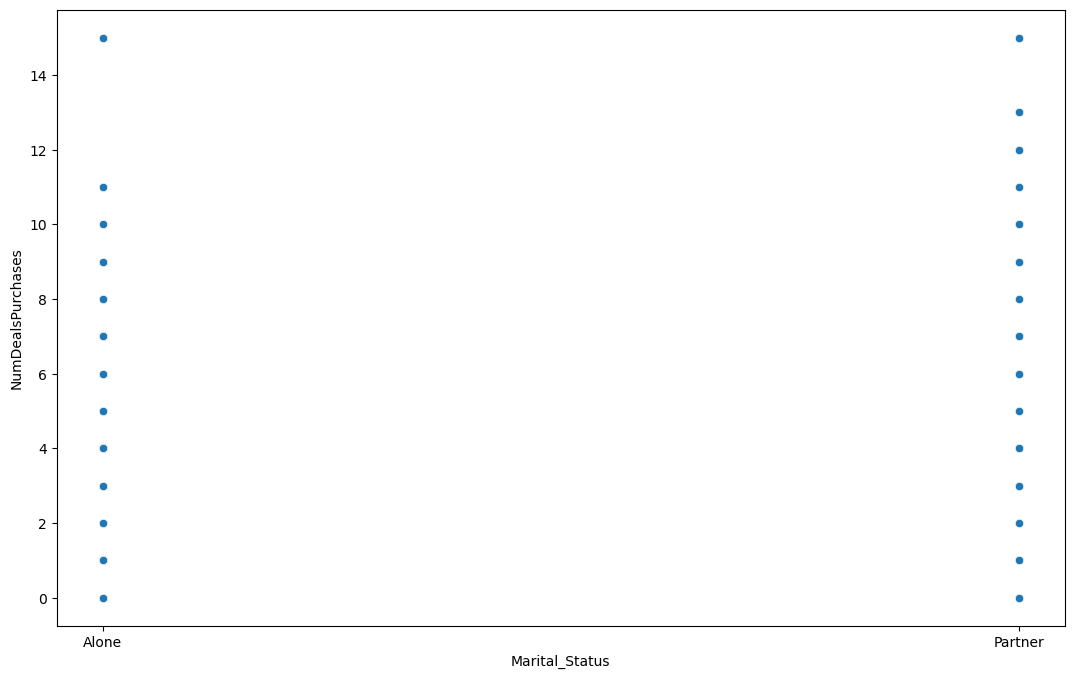

In [34]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Marital_Status'], y=df['NumDealsPurchases']);

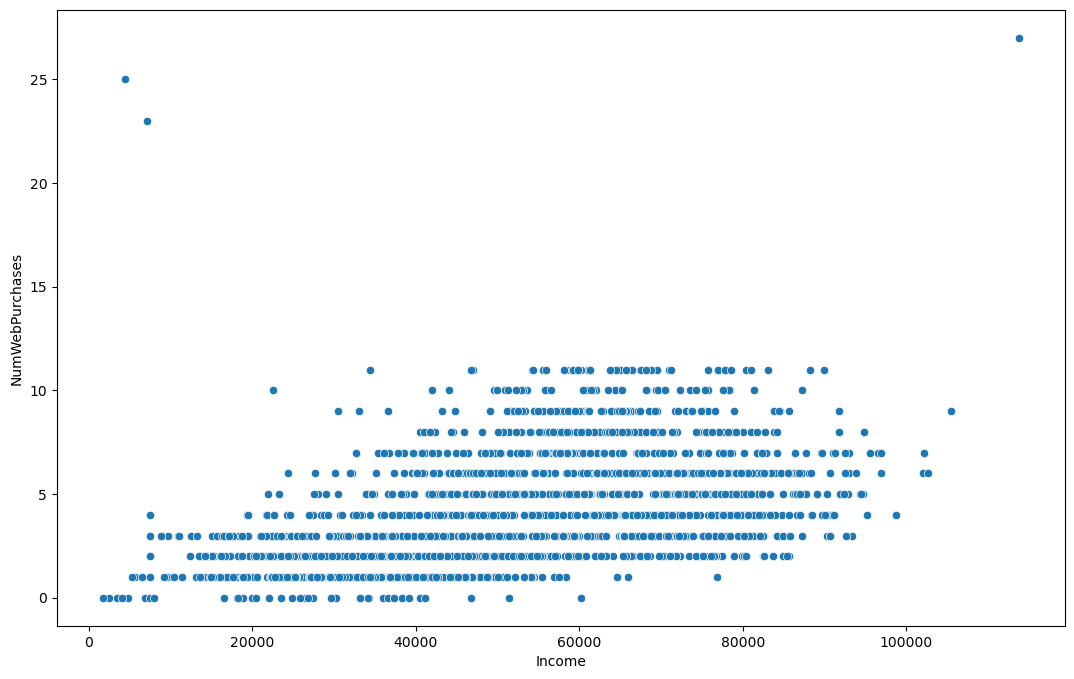

In [35]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Income'], y=df['NumWebPurchases']);

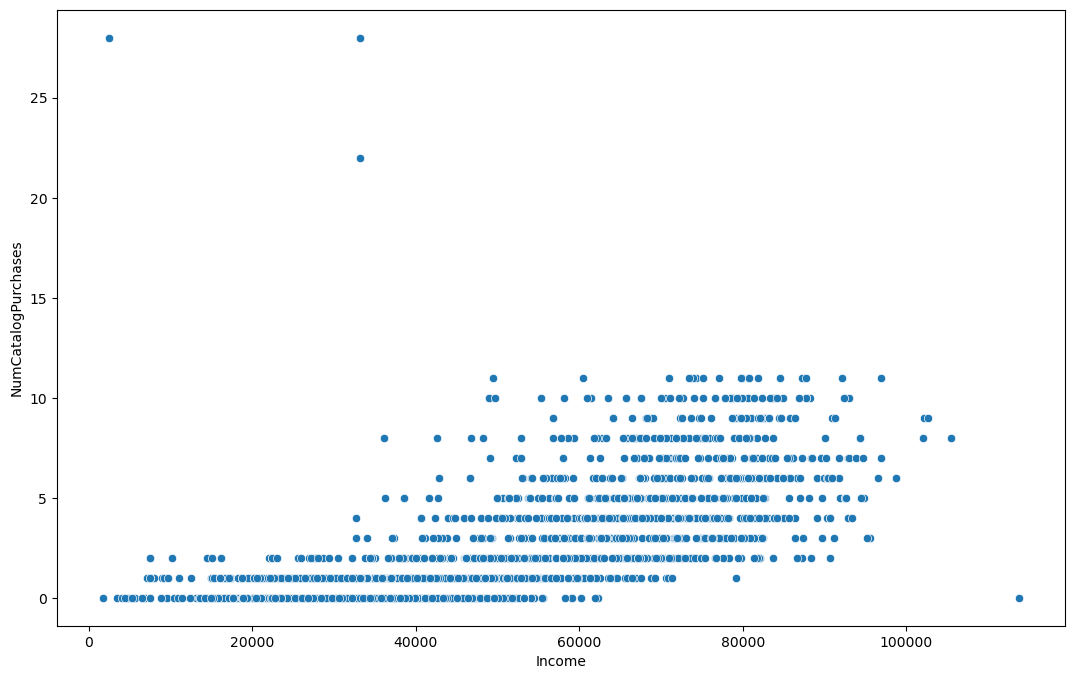

In [36]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Income'], y=df['NumCatalogPurchases']);

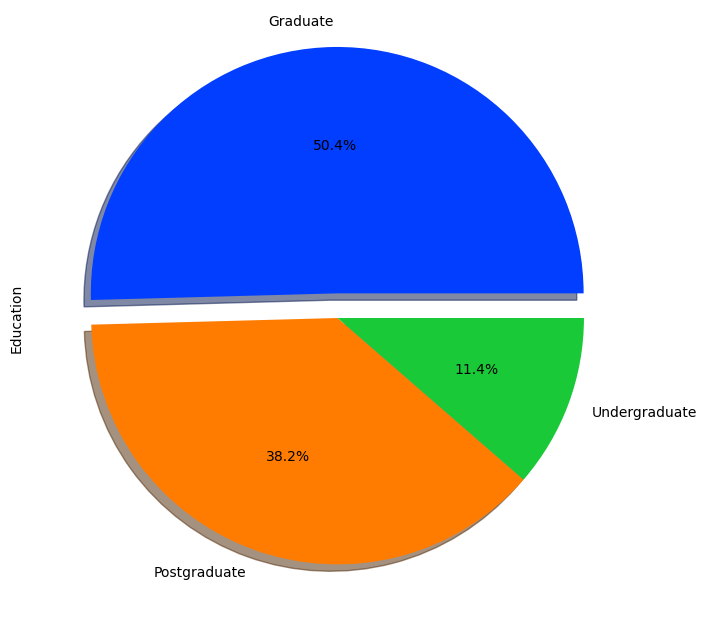

In [37]:
df['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));

<Axes: xlabel='Campaign', ylabel='Expenses'>

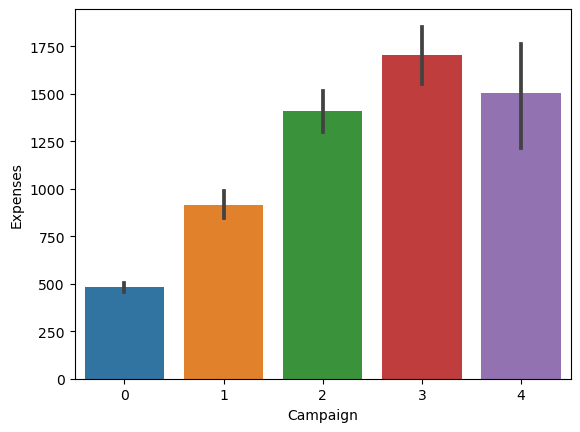

In [38]:
sns.barplot(y = 'Expenses', x = 'Campaign', data = df)

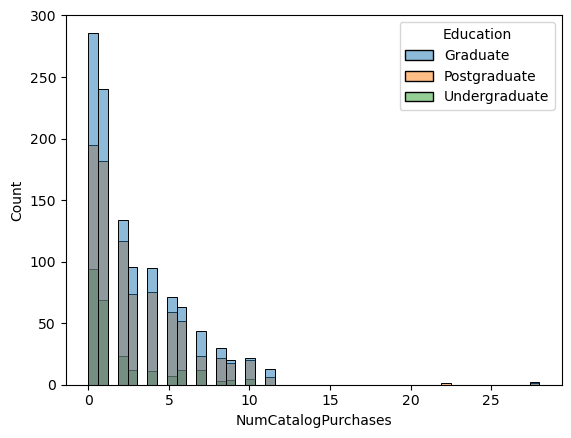

In [39]:
sns.histplot(x=df['NumCatalogPurchases'], hue=df['Education']);

## Multivariate Analysis

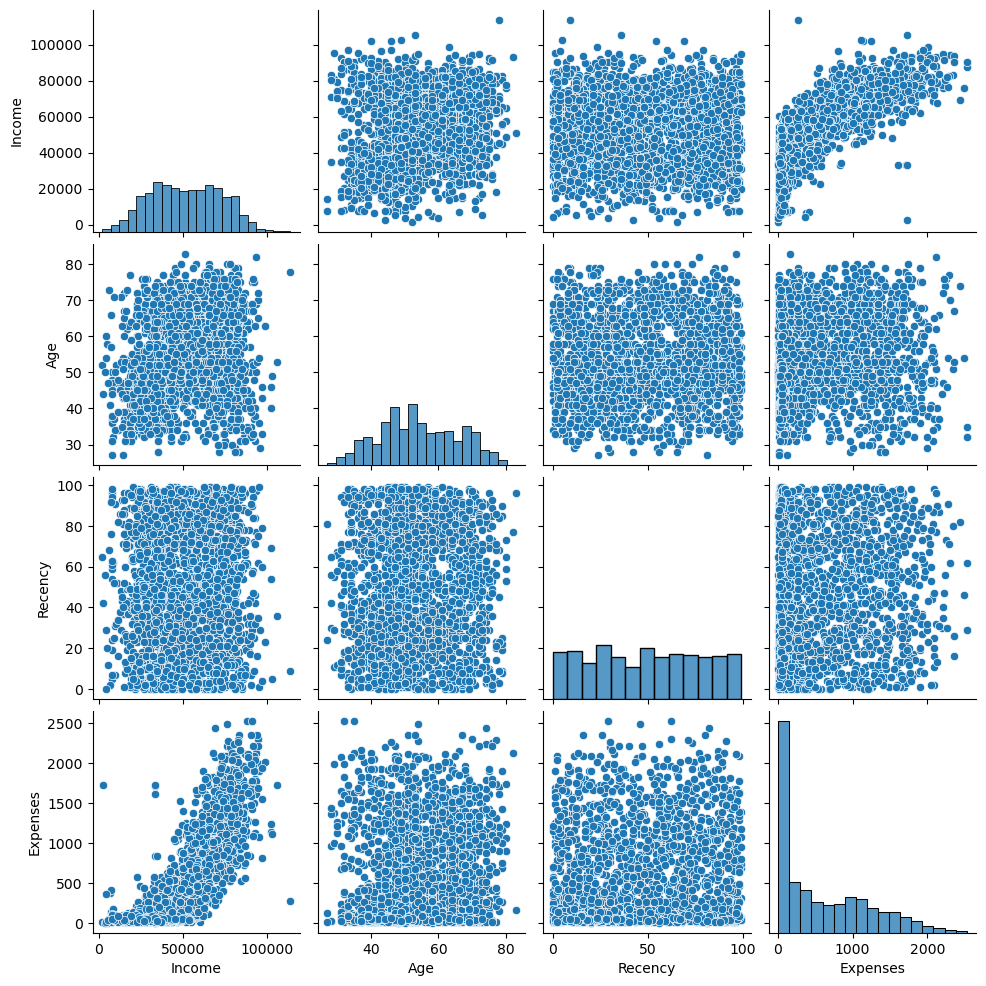

In [40]:
sns.pairplot(df, vars = ['Income', 'Age', 'Recency', 'Expenses'], palette = 'husl')
plt.show()

<Axes: >

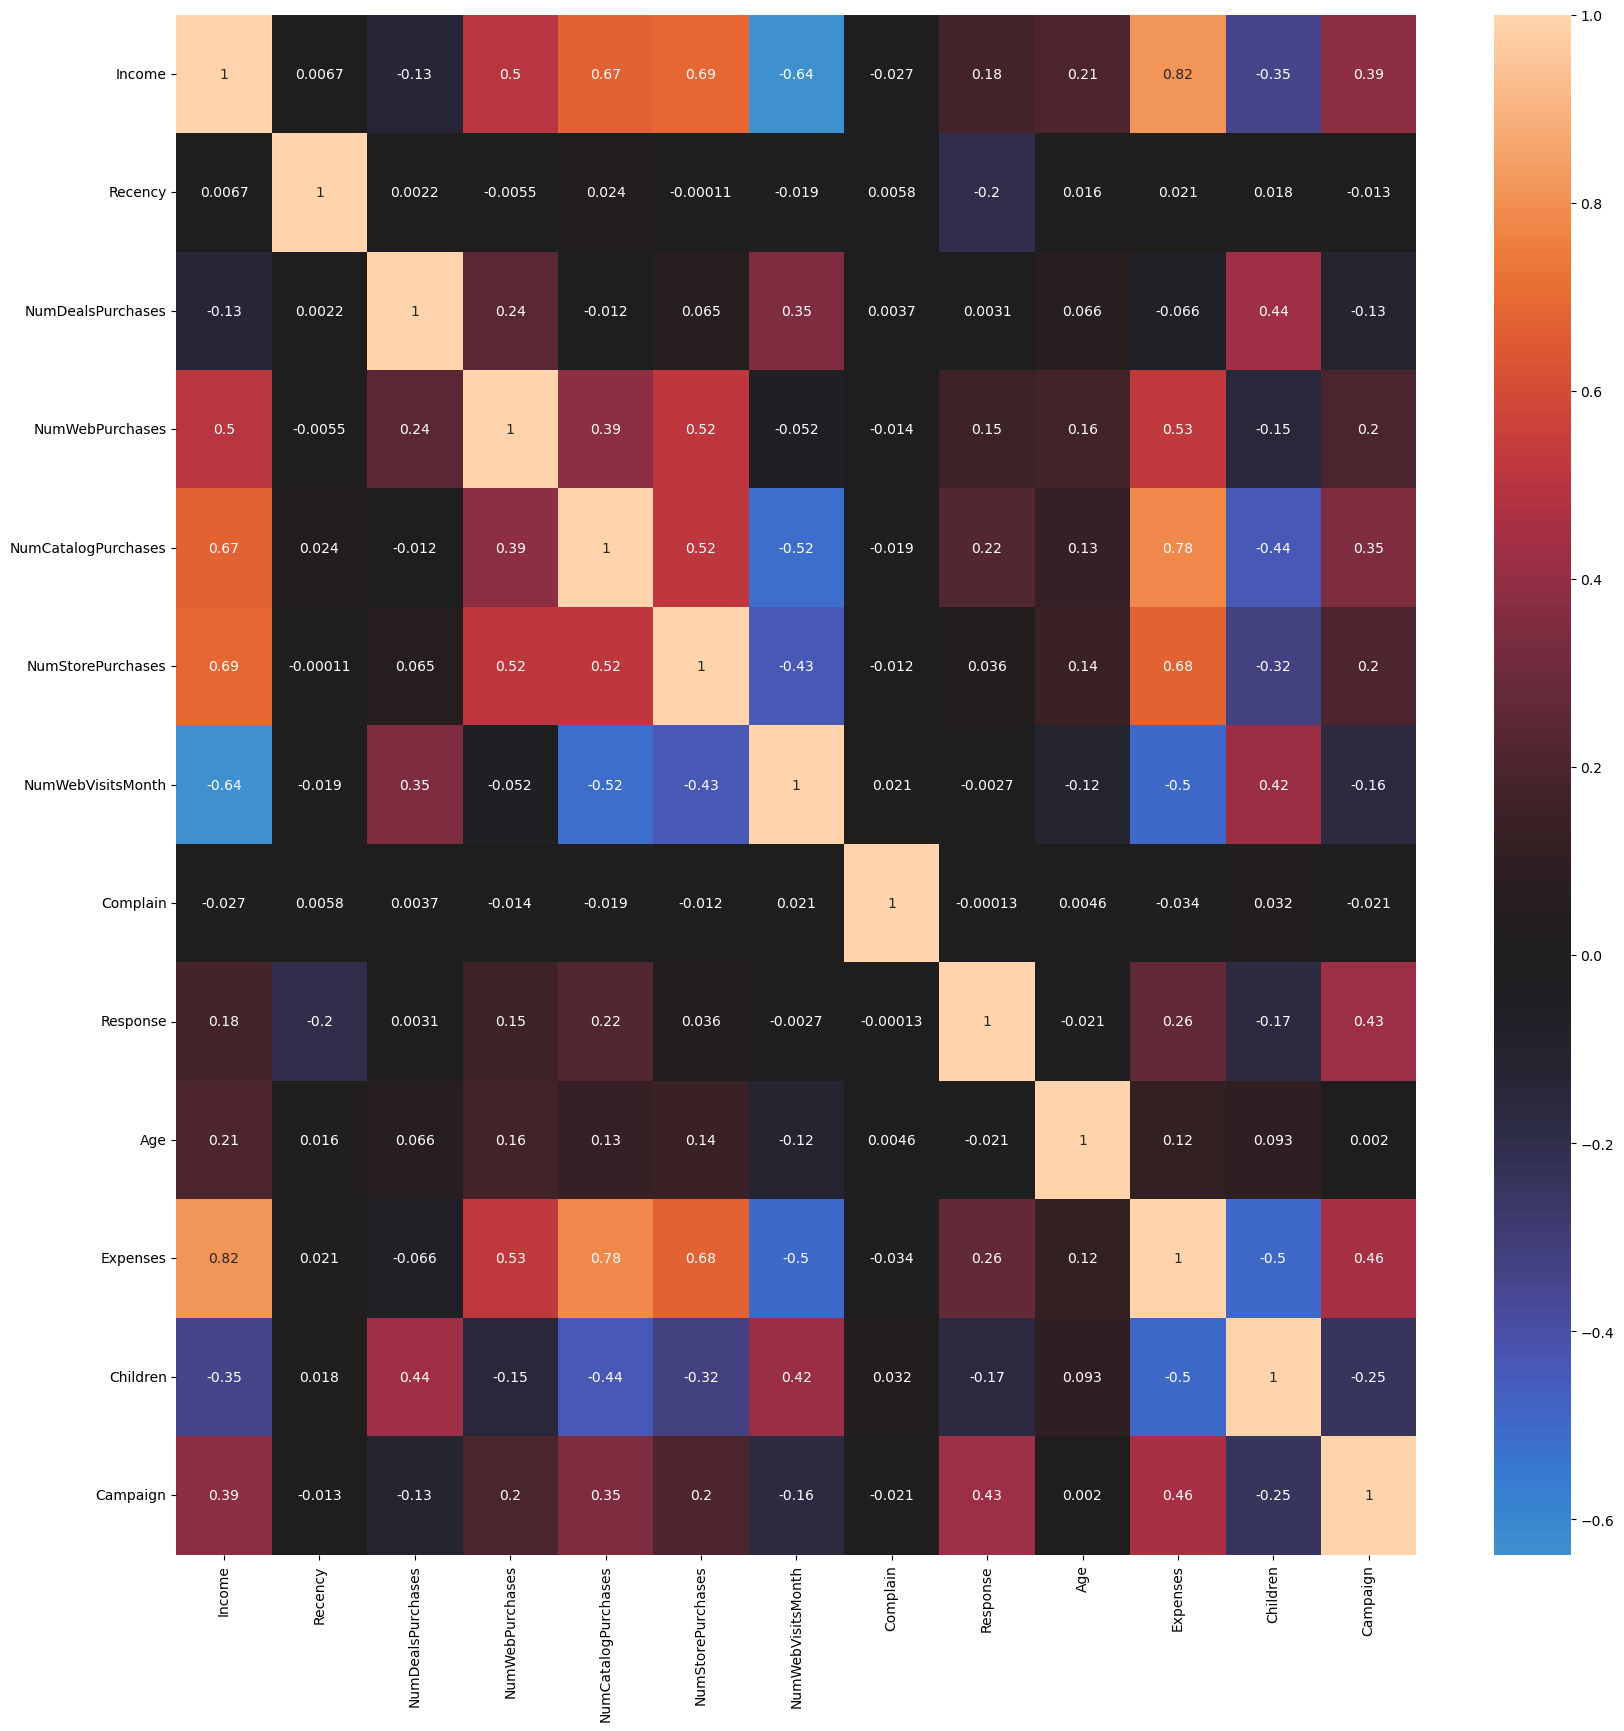

In [41]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(),annot=True, cmap=None, center=0)

# Data Transformation

In [42]:
df=pd.get_dummies(df,drop_first=True)

In [43]:
df.shape

(2213, 16)

In [44]:
df.head(2)

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Expenses,Children,Campaign,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner
0,58138.0,58,3,8,10,4,7,0,1,66,1617,0,0,0,0,0
1,46344.0,38,2,1,1,2,5,0,0,69,27,2,0,0,0,0


In [45]:
df1=df.copy(deep=True)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])

In [47]:
df.head(2)

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Expenses,Children,Campaign,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner
0,0.317986,0.310773,0.350656,1.427316,2.504247,-0.555456,0.692198,-0.095498,2.376057,1.018785,1.676723,-1.264914,-0.439042,-0.785933,-0.358477,-1.350076
1,-0.251762,-0.380424,-0.169104,-1.126455,-0.571168,-1.170837,-0.132699,-0.095498,-0.420865,1.275248,-0.962927,1.404857,-0.439042,-0.785933,-0.358477,-1.350076


In [48]:
df2=df.copy(deep=True)

# Hierarchical Clustering

In [49]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

### Single linkage

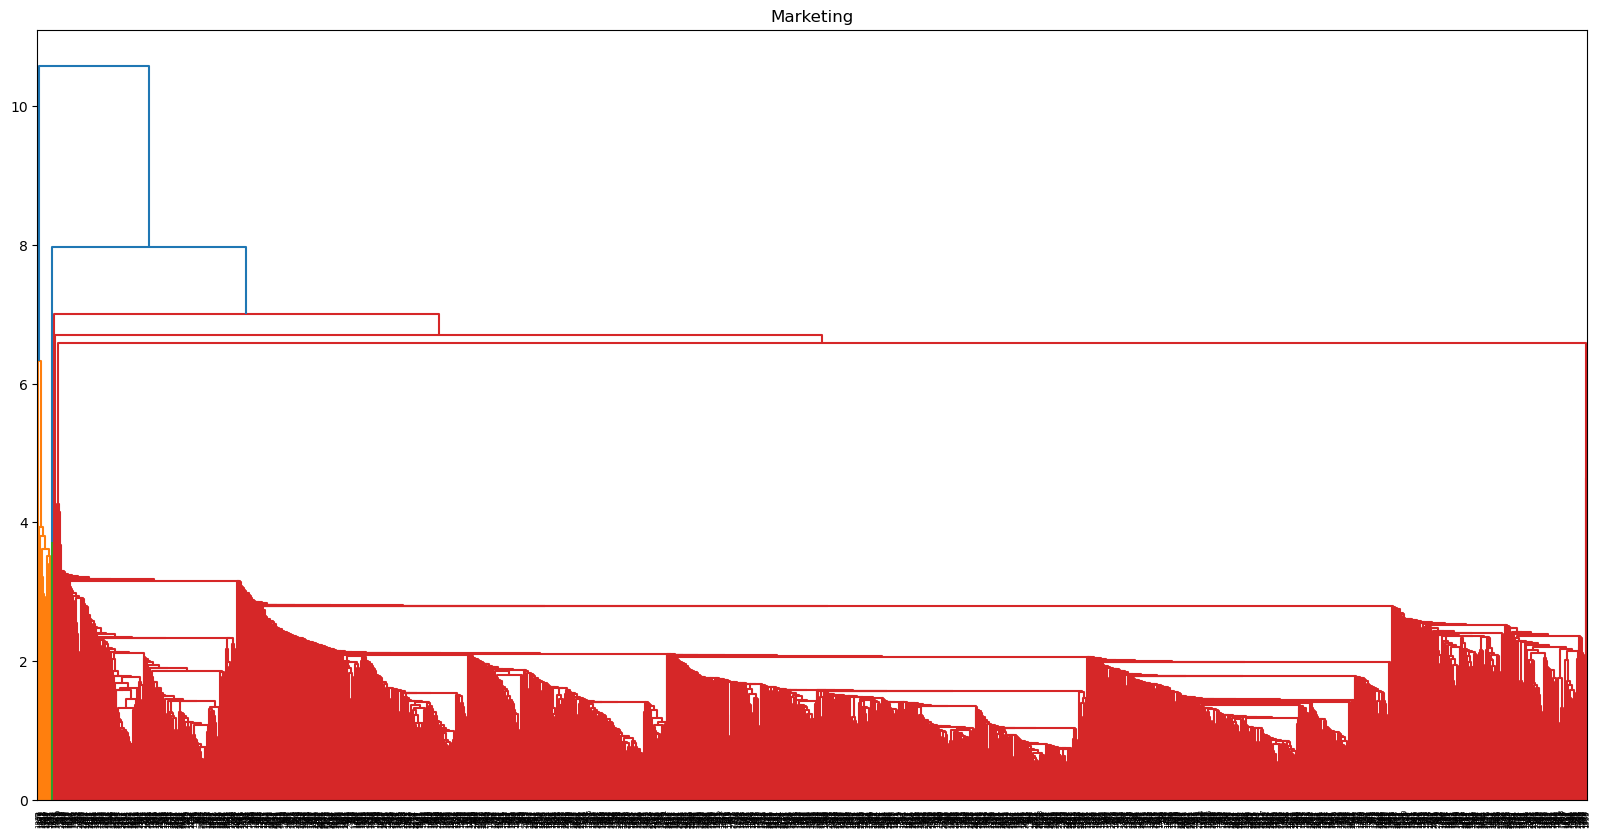

In [50]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df,method = 'single'))
plt.show()

### Complete linkage

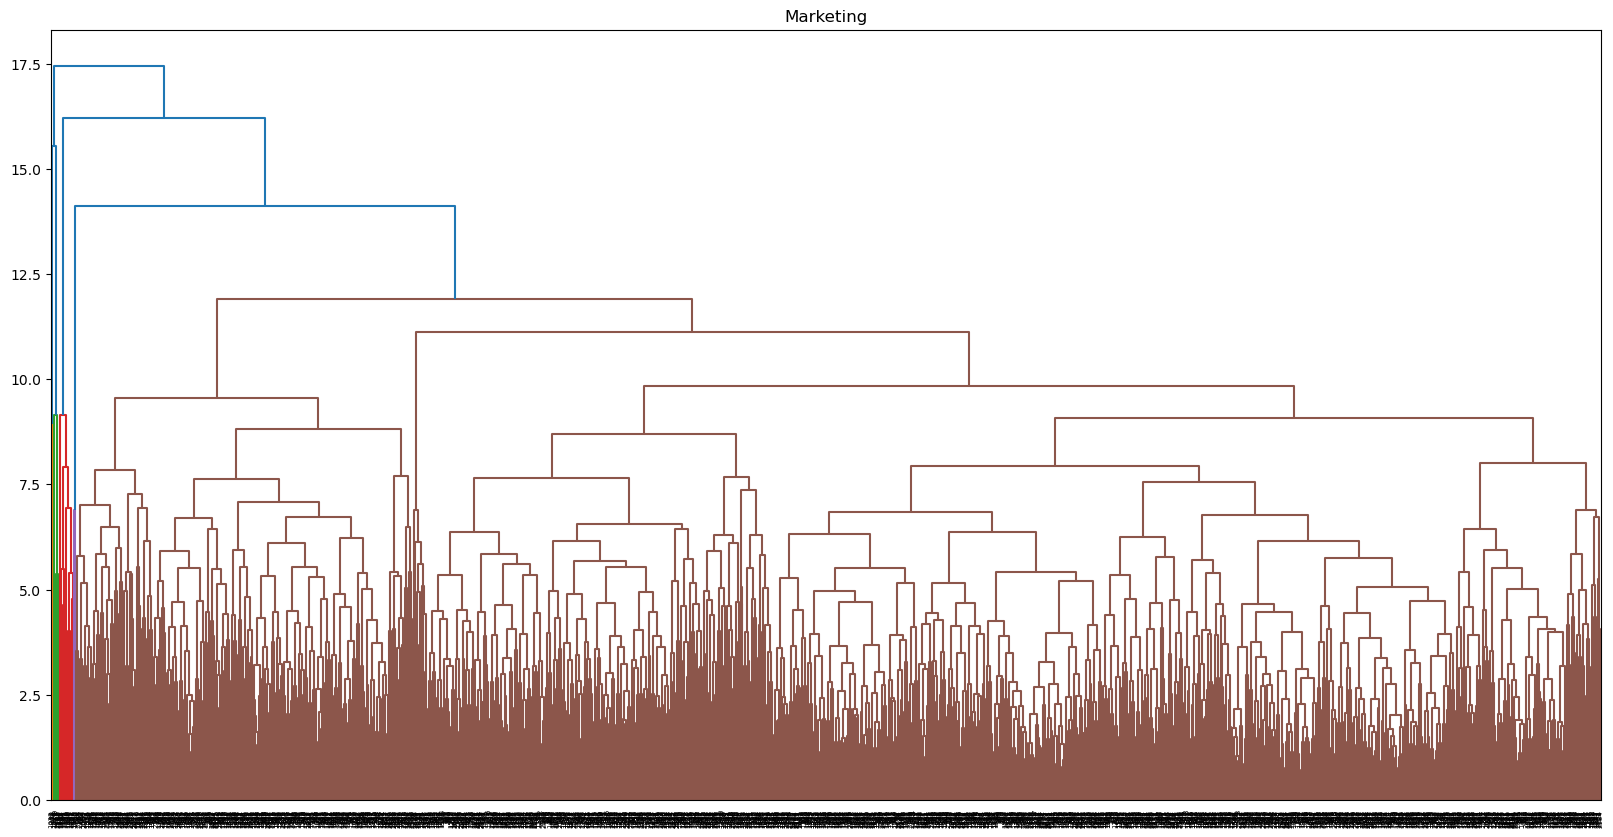

In [51]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df, method='complete'))
plt.show()

### Ward linkage

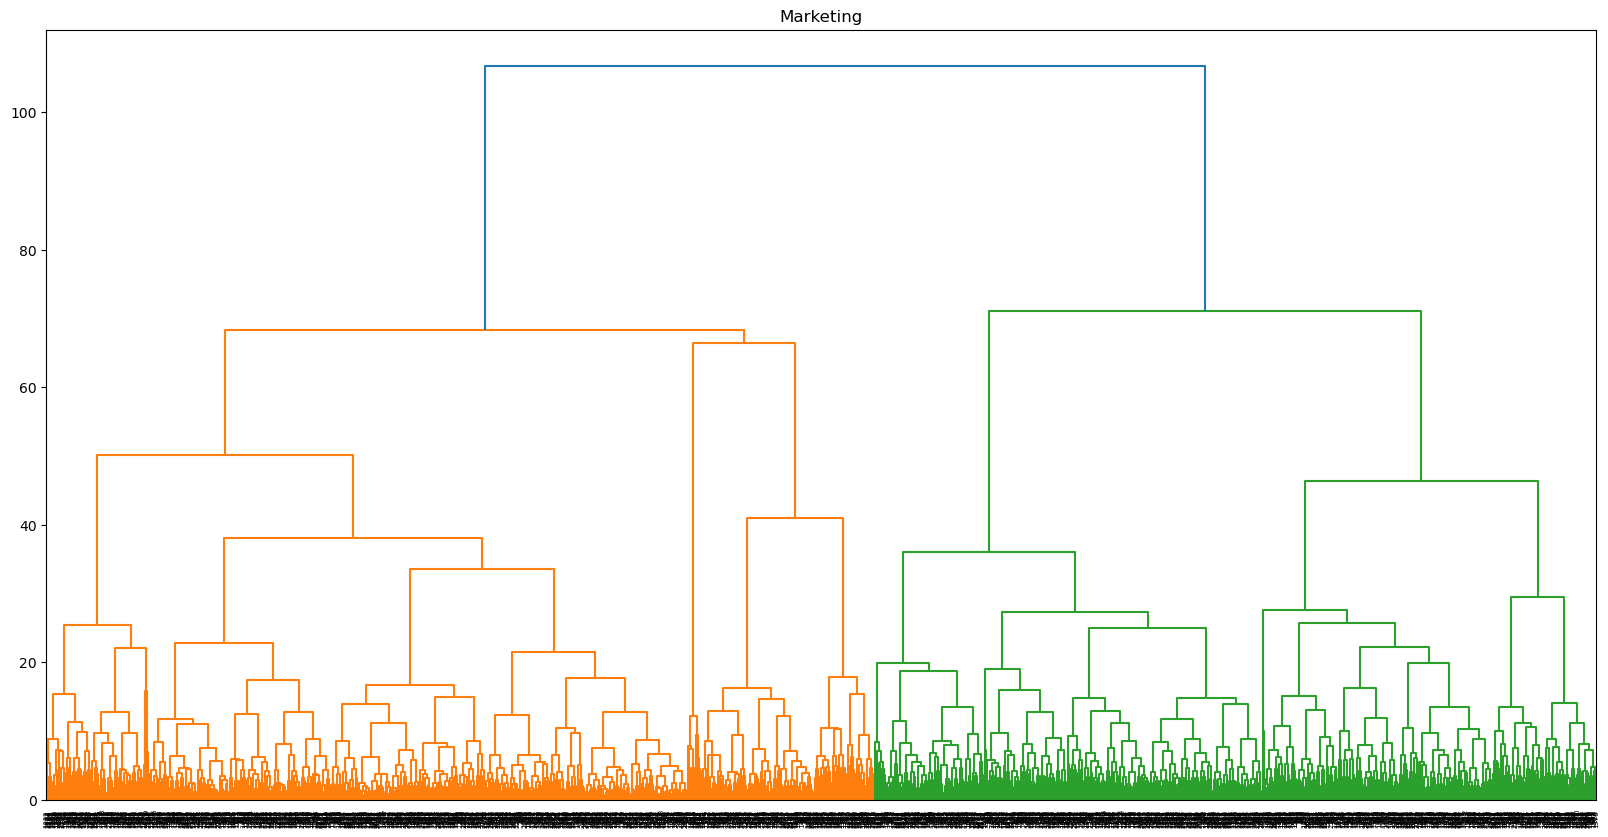

In [52]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.show()


### Average linkage

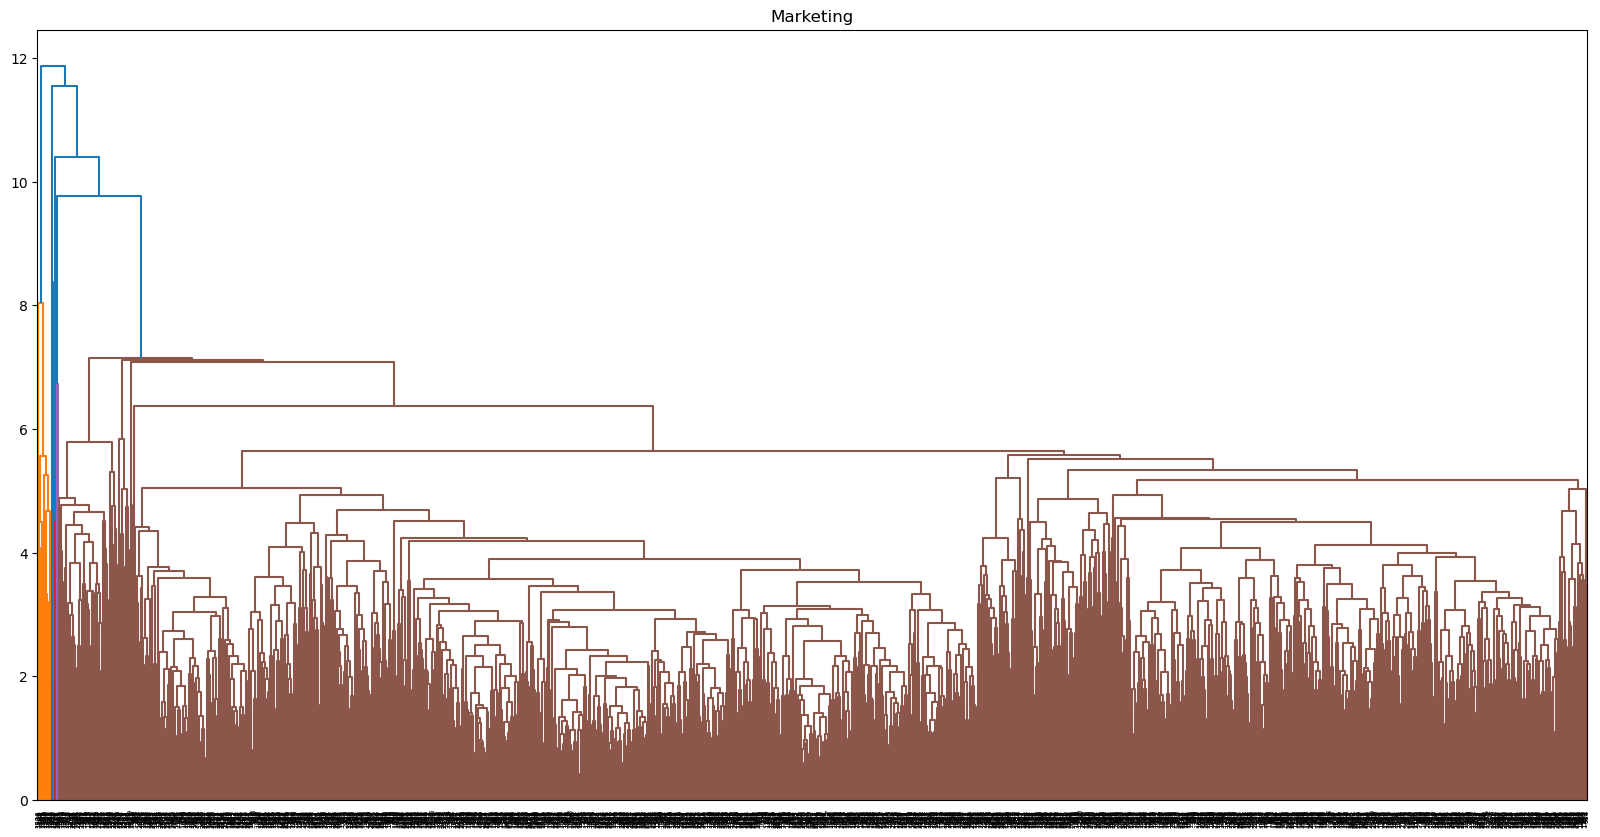

In [53]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df, method='average'))
plt.show()

### Centroid linkage

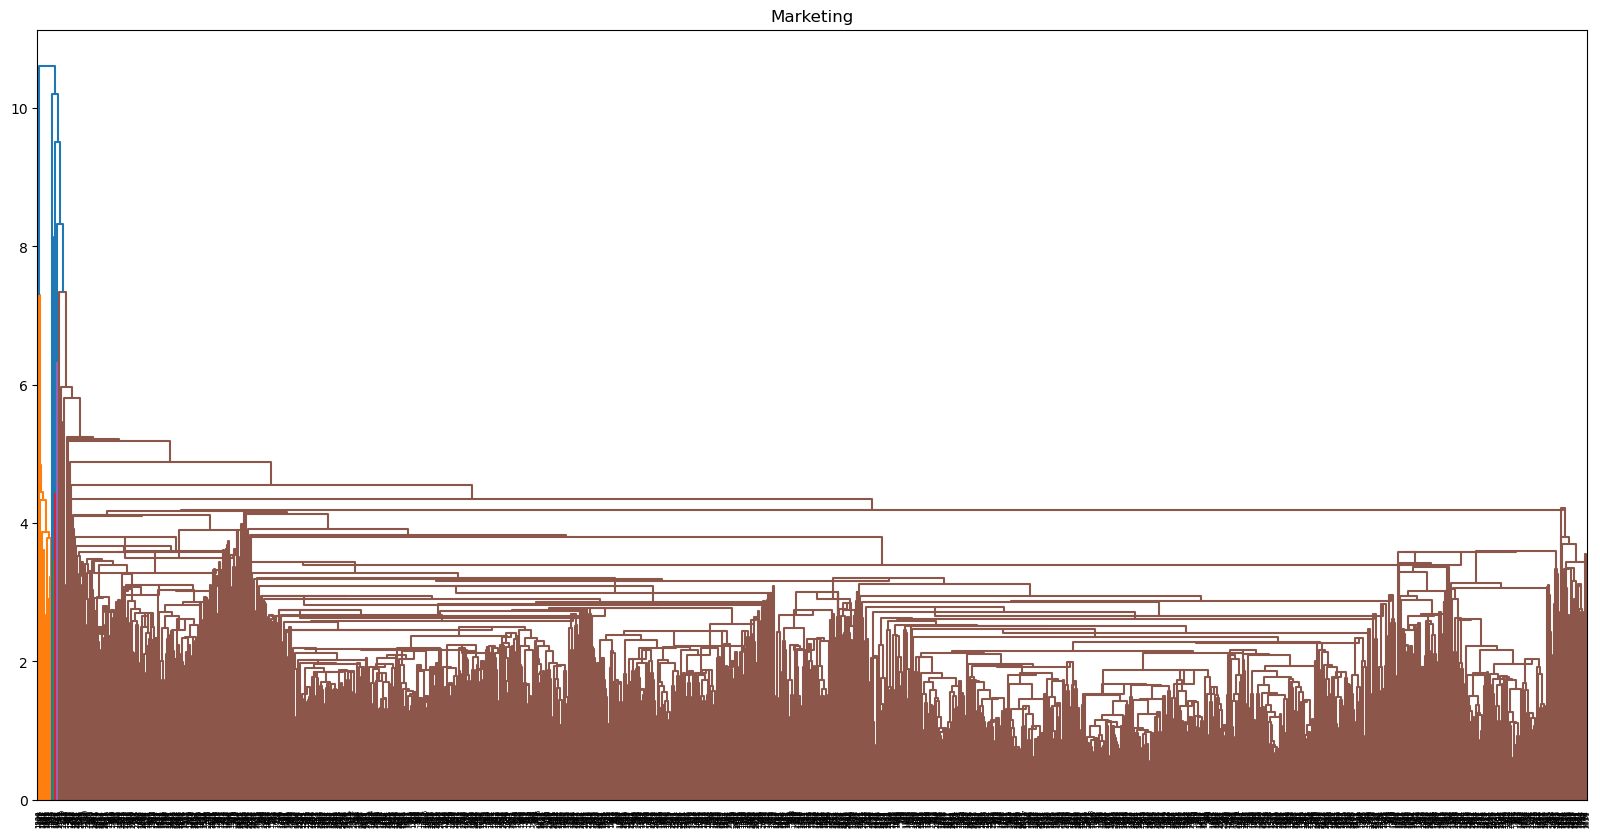

In [54]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df, method='centroid'))
plt.show()

In [55]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Y = cluster.fit_predict(df)
Y = pd.DataFrame(Y)
Y.value_counts()

0    915
2    554
1    477
3    247
4     20
dtype: int64

In [56]:
labels = cluster.labels_
labels

array([1, 0, 1, ..., 1, 2, 0], dtype=int64)

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
score = silhouette_score(df, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.1528593280067775


# KMeans 

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [60]:
kmeans = kmeans.fit(df)

In [61]:
K = kmeans.predict(df)

In [62]:
K = pd.DataFrame(K)
K.value_counts()

3    856
0    623
1    532
2    202
dtype: int64

In [63]:
clust = []
silhouette_scores = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    clust.append(int(kmeans.inertia_))
    labels = kmeans.labels_
    silhouette = silhouette_score(df, labels)
    silhouette_scores.append(silhouette)

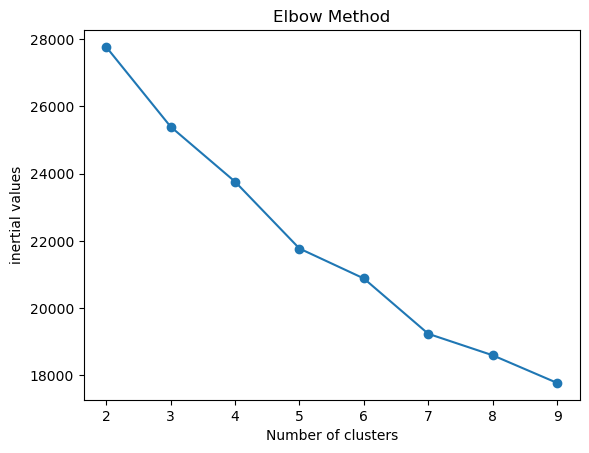

In [64]:
plt.plot(range(2,10), clust,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()

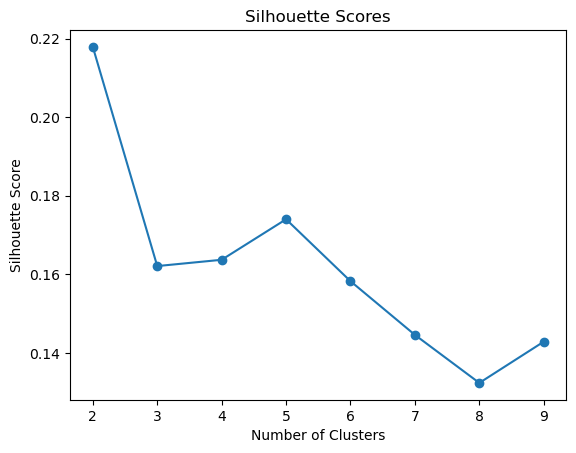

In [65]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

In [66]:
kmeans= KMeans(n_clusters=4)

In [67]:
kmeans.fit(df)

KMeans(n_clusters=4)

In [68]:
K= kmeans.predict(df)

In [69]:
K = pd.DataFrame(K)
K.value_counts()

2    1000
1     658
3     535
0      20
dtype: int64

In [70]:
Klabels = kmeans.labels_
kscore = silhouette_score(df, Klabels)
print("KMeans Silhouette Score:", kscore)

KMeans Silhouette Score: 0.17073343182657913


# DBSCAN

In [71]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [72]:
dbscan = DBSCAN(eps=6, min_samples=16)
dbscan.fit(df)

DBSCAN(eps=6, min_samples=16)

In [73]:
dblabels = dbscan.labels_

In [74]:
cl=pd.DataFrame(dblabels)
cl.value_counts()

 0    2183
 1      19
-1      11
dtype: int64

In [75]:
db_score = silhouette_score(df, dblabels)
print('The DBSCAN silhouette score is:',db_score)

The DBSCAN silhouette score is: 0.5187268240063568


In [76]:
df1["clusters"]=Klabels 

In [77]:
df1.groupby(["clusters"]).mean()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Expenses,Children,Campaign,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner
clusters,,,,,,,,,,,,,,,,
0,45672.400000,50.750000,2.400000,3.700000,2.100000,5.400000,5.850000,1.0,0.150000,54.650000,392.000000,1.200000,0.150000,0.150000,0.150000,0.650000
1,57930.680851,47.580547,3.846505,6.446809,3.120061,7.840426,5.731003,0.0,0.107903,57.972644,742.895137,1.182371,0.191489,0.452888,0.065350,0.680851
2,34173.050000,49.399000,1.967000,2.054000,0.551000,3.182000,6.431000,0.0,0.087000,51.320000,95.391000,1.215000,0.089000,0.340000,0.165000,0.645000
3,76425.392523,49.966355,1.121495,5.001869,6.104673,8.220561,2.725234,0.0,0.321495,54.441121,1404.267290,0.149533,0.826168,0.381308,0.076636,0.603738


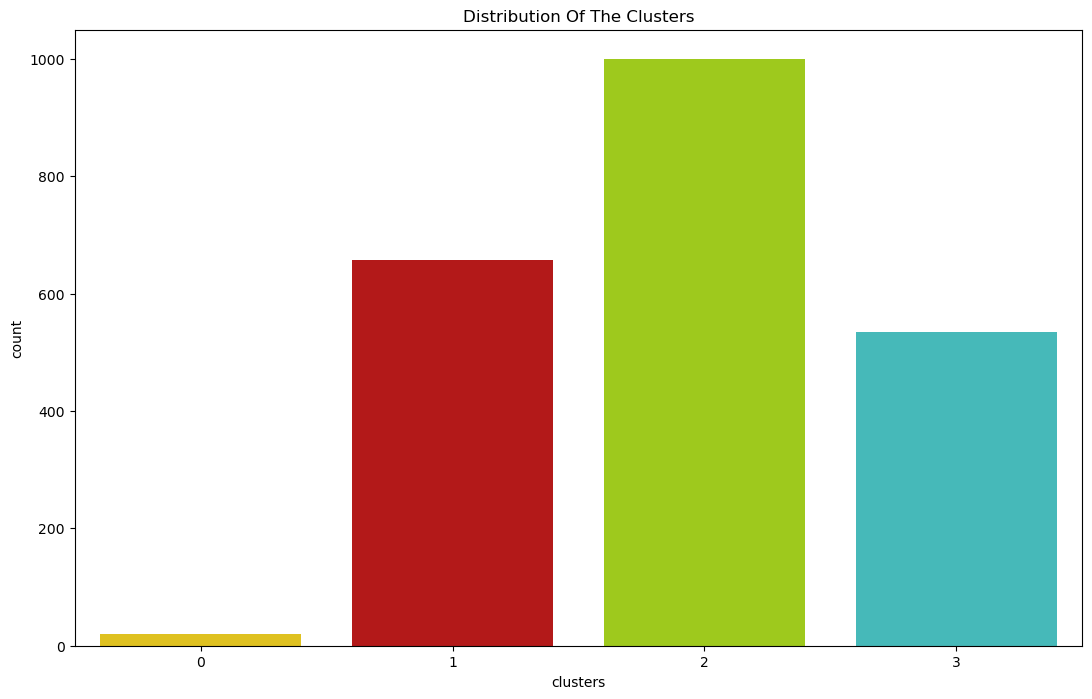

In [78]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=df1['clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

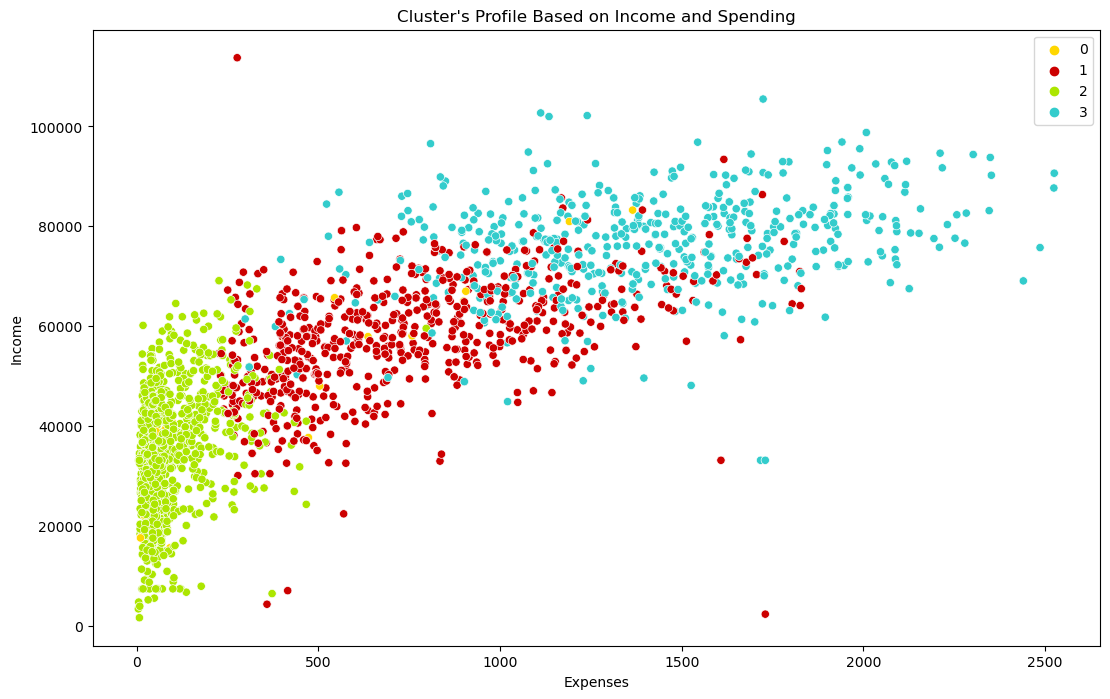

In [79]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=df, x=df1['Expenses'], y=df1['Income'], hue=df1['clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

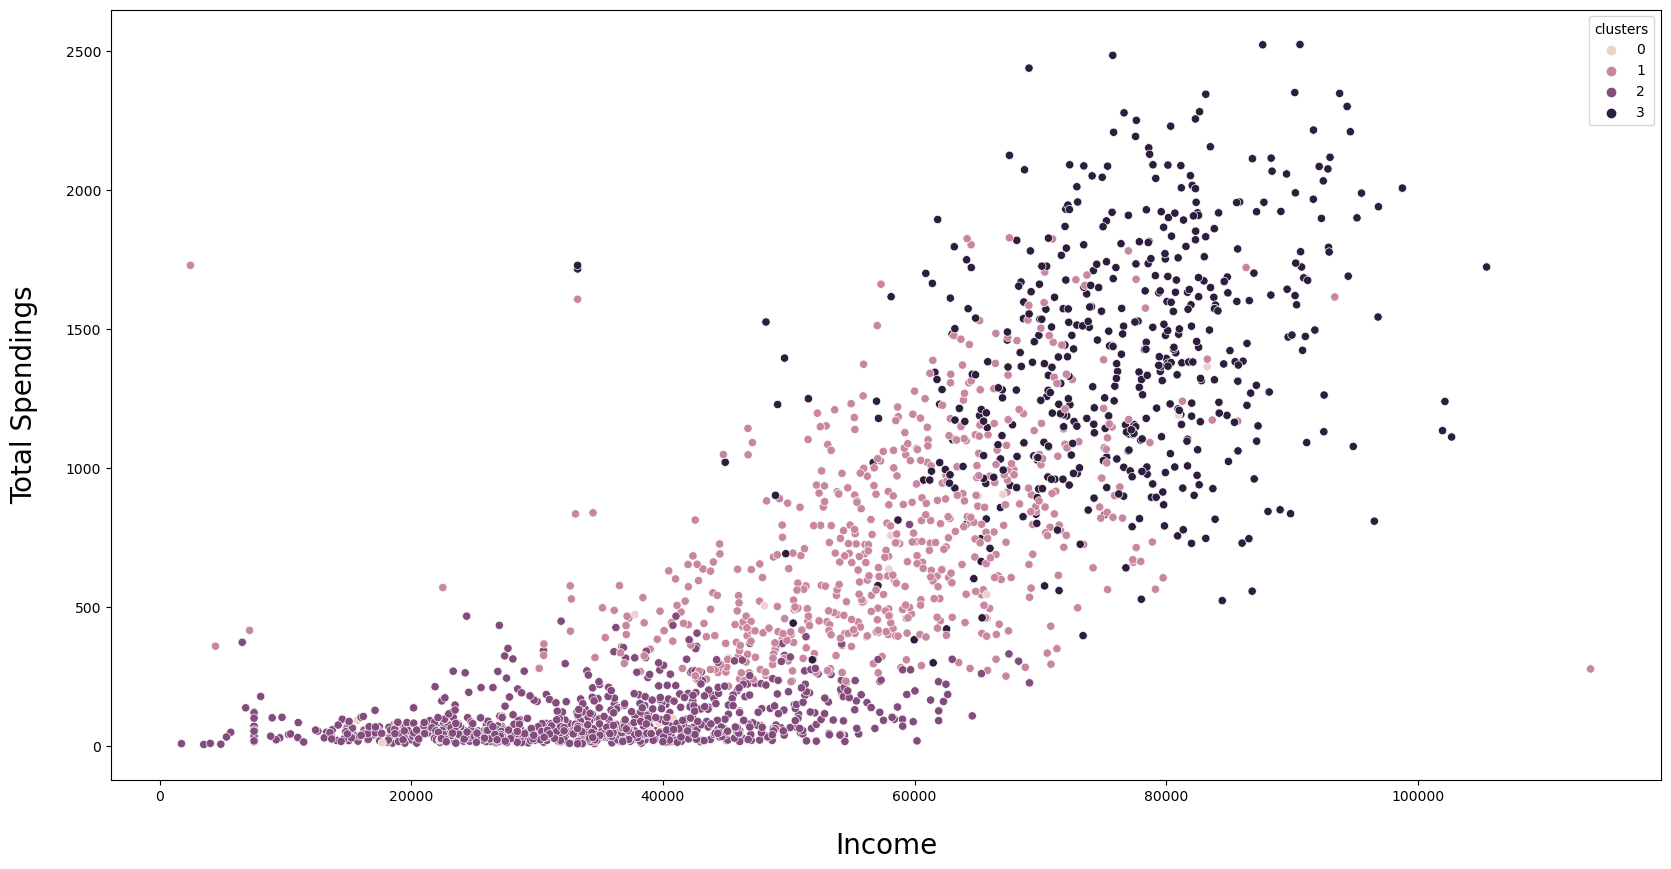

In [80]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df1, x='Income', y='Expenses', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

In [81]:
df1.groupby(['clusters']).mean()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Expenses,Children,Campaign,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner
clusters,,,,,,,,,,,,,,,,
0,45672.400000,50.750000,2.400000,3.700000,2.100000,5.400000,5.850000,1.0,0.150000,54.650000,392.000000,1.200000,0.150000,0.150000,0.150000,0.650000
1,57930.680851,47.580547,3.846505,6.446809,3.120061,7.840426,5.731003,0.0,0.107903,57.972644,742.895137,1.182371,0.191489,0.452888,0.065350,0.680851
2,34173.050000,49.399000,1.967000,2.054000,0.551000,3.182000,6.431000,0.0,0.087000,51.320000,95.391000,1.215000,0.089000,0.340000,0.165000,0.645000
3,76425.392523,49.966355,1.121495,5.001869,6.104673,8.220561,2.725234,0.0,0.321495,54.441121,1404.267290,0.149533,0.826168,0.381308,0.076636,0.603738


- started with performing various operations to understand shape of data ,structure of data,summary statistics of data,missing values .
- then performing one hot encoder for converting catergorical to numerical and then scaling of numerical values using standard scaler 
- Then visualizing the clusters, and the relationship between different variables in data

In [82]:
import pickle
pickle.dump(kmeans,open('kmeansmodel.pkl','wb'))

 - cluster 0:Low expenses high income
 - cluster 1:Average Spendings Average  income
 - cluster 2:High Income Average Expenses
 - cluster 3:High expenses High Income